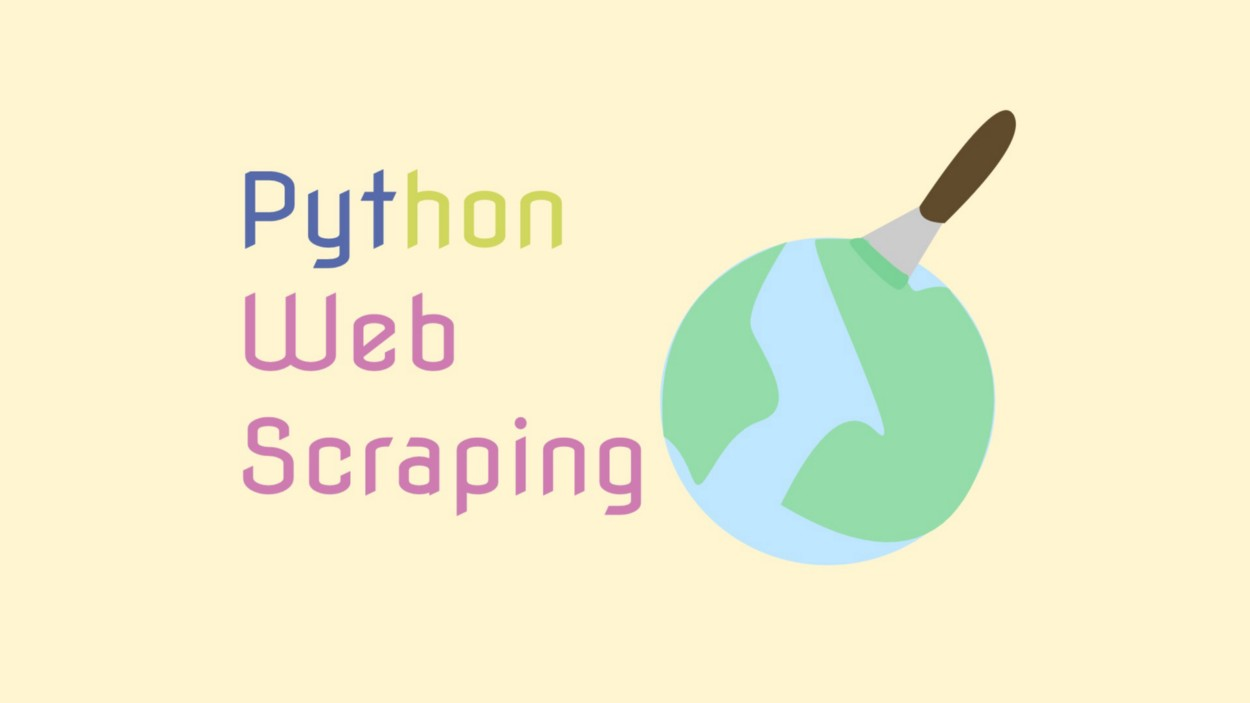

#### 1. Write a python program which searches all the product under a particular product vertical from www.amazon.in. The product verticals to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [1]:
# Importing all the required library for the project.
import pandas as pd
import re
import selenium 
from selenium import webdriver
from time import sleep
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys

In [2]:
driver= webdriver.Chrome("chromedriver.exe")
# Get the webpage
url="https://www.amazon.in/" 
driver.get(url)
driver.maximize_window()

In [3]:
search_product=driver.find_element_by_xpath('//input[@type="text"]')
search_product.send_keys("Watches")

search_btn=driver.find_element_by_xpath('(//input[@type="submit"])[1]')
search_btn.click()

#### 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [4]:
Brand_Name=[]
Product_Name=[]
Price=[]
Product_url=[]
for i in range(3):
    print('Scraping Page',i+1)
    
    brand=driver.find_elements_by_xpath("//h5[@class='s-line-clamp-1']")
    for b in brand:
        Brand_Name.append(b.text)  
    sleep(1) 
    
    product=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']")
    for p in product:
        Product_Name.append(p.text)
    sleep(1)
        
    price=driver.find_elements_by_xpath("//span[@class='a-price-whole']")
    for pr in price:
        Price.append(pr.text)
    sleep(1)
        
    product_url=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']/a")
    for url in product_url:
        Product_url.append(url.get_attribute('href'))
    sleep(1)
    
    try:
        Next_btn=driver.find_element_by_xpath("//li[@class='a-last']")
        Next_btn.click()
        
    except:
        break 

Scraping Page 1
Scraping Page 2
Scraping Page 3


In [5]:
for i in range(3):
    print('Scraping Page',i+1)
    
    brand=driver.find_elements_by_xpath("//h5[@class='s-line-clamp-1']")
    for b in brand:
        Brand_Name.append(b.text)  
    sleep(1) 
    try:
        Next_btn=driver.find_element_by_xpath("//li[@class='a-last']")
        Next_btn.click()
        
    except:
        break 

Scraping Page 1
Scraping Page 2


In [6]:
Brand=[]
Rating=[]
No_of_Ratings=[]
Return_Exchange=[]
Expected_Delivery=[]
Availability=[]
Other_Details=[]

for i in Product_url:
    driver.get(i)
    sleep(1)
   
    try:
        brand1=driver.find_elements_by_xpath("//div[@class='a-column a-span6 a-spacing-base a-ws-span6']/table/tbody/tr[6]/td")
        for i in brand1:
            Brand.append(i.text)
        sleep(1)
    except:
        Brand.append("--")
        sleep(1)
        
    try:
        rating=driver.find_elements_by_xpath("//span[@class='a-size-medium a-color-base']")
        for r in rating:
            Rating.append(r.text)
        sleep(1)
    except:
        Rating.append('--')
        sleep(1)
    

    try:
        no_of_Ratings=driver.find_elements_by_xpath("//div[@class='a-row a-spacing-medium averageStarRatingNumerical']")
        for s in no_of_Ratings:
            No_of_Ratings.append(s.text)
        sleep(1)
    except:
        No_of_Ratings.append('--')
        sleep(1)
        
    try:
        return_Exchange=driver.find_elements_by_xpath("//div[@id='icon-farm-container']/div/div[2]")
        for r in return_Exchange:
            Return_Exchange.append(r.text)
        sleep(1)
    except:
        Return_Exchange.append('--')
        sleep(1)
        
    try:
        expected_Delivery=driver.find_elements_by_xpath("//div[@id='ddmDeliveryMessage']/b")
        for ed in expected_Delivery:
            Expected_Delivery.append(ed.text)
        sleep(1)
    except:
        Expected_Delivery.append('--')
        sleep(1)
        
    try:
        availability=driver.find_elements_by_xpath("//div[@id='availability']")
        for ed in availability:
            availability.append(ed.text)
        sleep(1)
    except:
        availability.append('--')
        sleep(1)
        
    try:
        other_Details=driver.find_elements_by_xpath("//div[@class='a-section a-spacing-medium a-spacing-top-small']")
        for od in other_Details:
            Other_Details.append(od.text)
        sleep(1)
    except:
        Other_Details.append('--')
        sleep(1)
    

In [7]:
Product_details=pd.DataFrame({})
Product_details['Price']=Price[0:170]
Product_details['Rating']=Rating[0:170]
Product_details['No_of_Ratings']=No_of_Ratings[0:170]
Product_details['Return_Exchange']=Return_Exchange[0:170]
Product_details['Expected_Delivery']=Expected_Delivery[0:170]
Product_details['Product_url']=Product_url[0:170]
Product_details['Other_Details']=Other_Details[0:170]
Product_details 

,Price,Rating,No_of_Ratings,Return_Exchange,Expected_Delivery,Product_url,Other_Details
0,"22,990",3.9 out of 5,41 global ratings,10 Days Returns,"Friday, Dec 17",https://www.amazon.in/gp/slredirect/picassoRed...,"About this item\nDial Color: Black , Case Shap..."
1,"22,990",3.3 out of 5,"1,880 global ratings",Amazon Delivered,"Tuesday, Dec 21",https://www.amazon.in/gp/slredirect/picassoRed...,About this item\nDial Color: Multicolored\nDia...
2,"17,990",3.6 out of 5,40 global ratings,10 Days Returns,"Friday, Dec 17",https://www.amazon.in/gp/slredirect/picassoRed...,About this item\nJapanese Quartz Movement AND ...
3,575,3.5 out of 5,"2,158 global ratings",10 Days Returns,"Friday, Dec 17",https://www.amazon.in/gp/slredirect/picassoRed...,About this item\nDial Color: Black\nDial Shape...
4,449,4.2 out of 5,"34,934 global ratings",7 Days Replacement,"Friday, Dec 17",https://www.amazon.in/boAt-Smartwatch-Multiple...,About this item\nAlexa built-in Voice Assistan...
...,...,...,...,...,...,...,...
165,"2,999",4.2 out of 5,82 global ratings,Amazon Delivered,"Friday, Dec 17",https://www.amazon.in/HAMT-Black-Chain-Strap-W...,About this item\nDial Color: Black; Dial Mater...
166,355,3.8 out of 5,33 global ratings,Amazon Delivered,"Friday, Dec 17",https://www.amazon.in/MontVitton-Functioning-B...,About this item\nDial Color: Multicolored\nDia...
167,349,3.6 out of 5,737 global ratings,10 Days Returns,"Friday, Dec 17",https://www.amazon.in/Goldenize-fashion-Rectan...,About this item\nWatch Movement Type: Quartz; ...
168,410,3.9 out of 5,527 global ratings,10 Days Returns,"Friday, Dec 17",https://www.amazon.in/Womens-Android-Smartwatc...,【2021 Upgraded Smart Watch】 Equipped with 1.33...


#### 3. Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

In [8]:
driver= webdriver.Chrome("chromedriver.exe")
# Get the webpage
url='https://images.google.com/'

In [9]:
Fruit_image=[]
Cars_image=[]
ML_image=[]
Keywords =['Fruits','Cars','Machine Learning']
for i in Keywords:
    driver.get(url)
    driver.maximize_window()
    driver.execute_script("window.scrollBy(0,4000)","")
    sleep(5)

    search_image=driver.find_element_by_xpath('//input[@type="text"]')
    search_btn=driver.find_element_by_xpath('//button[@class="Tg7LZd"]')
    
    search_image.send_keys(i)
    search_btn.click()
    sleep(4)
    fruit_image=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']/img")
    for i in fruit_image:
        Fruit_image.append(i.get_attribute('src'))
    sleep(2)
    
    car_image=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']/img")
    for i in fruit_image:
        Cars_image.append(i.get_attribute('src'))
    sleep(2)
    
    ml_image=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']/img")
    for i in fruit_image:
        ML_image.append(i.get_attribute('src'))
    sleep(2)

In [10]:
Image_data=pd.DataFrame({})
Image_data["Fruit_image"]= Fruit_image[0:100]
Image_data["Cars_image"]= Cars_image[0:100]
Image_data["ML_image"]= ML_image[0:100]
Image_data

,Fruit_image,Cars_image,ML_image
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
...,...,...,...
95,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
96,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
97,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
98,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


#### 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [16]:
url = 'https://www.flipkart.com/'
driver = webdriver.Chrome('chromedriver.exe')
driver.get(url)
driver.maximize_window()
sleep(2)

In [17]:
search_product = driver.find_element_by_xpath('//input[@class="_3704LK"]')
search_btn= driver.find_element_by_xpath('//button[@class ="L0Z3Pu"]')

In [18]:
search_product.send_keys('Oneplus Nord, pixel 4A')
search_btn.click()

In [19]:
Url=[]
url = driver.find_elements_by_xpath('//a[@class ="_1fQZEK"]')
for i in url:
    Url.append(i.get_attribute('href'))

In [20]:
Brand_name =[]
Price=[]
Colour=[]
Display_size=[]
Display_resolution=[]
Primary_Camera=[]
Secondary_camera=[]
RAM=[]
ROM= []
Battery_capacity =[]
Processor =[]
Processor_core =[]

for i in Url:
    driver.get(i)
    sleep(2)
    
    readmore =driver.find_element_by_xpath('//button[@class ="_2KpZ6l _1FH0tX"]')
    readmore.click()
    sleep(2)

    try:
        brand = driver.find_element_by_xpath('//span[@class="B_NuCI"]')
        Brand_name.append(brand.text)
        
    except:
        Brand_name.append('--') 
    
    
    try:
        price = driver.find_element_by_xpath('//div[@class="_30jeq3 _16Jk6d"]')
        Price.append(price.text)
        
    except:
        Price.append('--')
        
    try:
        color = driver.find_element_by_xpath('//div [@class ="_3k-BhJ"][1]/table/tbody/tr[4]/td[2]/ul/li')
        Colour.append(color.text)
        
    except:
        Colour.append('--')
        
    try:
        dsize = driver.find_element_by_xpath('//div [@class ="_3k-BhJ"][2]/table/tbody/tr[1]/td[2]/ul/li')
        Display_size.append(dsize.text)
        
    except:
        Display_size.append('--')
        
        
    try:
        resolution = driver.find_element_by_xpath('//div [@class ="_3k-BhJ"][2]/table/tbody/tr[2]/td[2]/ul/li')
        Display_resolution.append(resolution.text)
        
    except:
        Display_resolution.append('--')
        
        
    try:
        pcamera = driver.find_element_by_xpath('//div [@class ="_3k-BhJ"][5]/table/tbody/tr[2]/td[2]/ul/li')
        Primary_Camera.append(pcamera.text)
        
    except:
        Primary_Camera.append('--')
        
        
    try:
        scamera = driver.find_element_by_xpath('//div [@class ="_3k-BhJ"][5]/table/tbody/tr[5]/td[2]/ul/li')
        Secondary_camera.append(scamera.text)
        
    except:
        Secondary_camera.append('--')
        
        
    try:
        ram = driver.find_element_by_xpath('//div [@class ="_3k-BhJ"][4]/table/tbody/tr[2]/td[2]/ul/li')
        RAM.append(ram.text)
        
    except:
        RAM.append('--')
        
        
        
    try:
        rom = driver.find_element_by_xpath('//div [@class ="_3k-BhJ"][4]/table/tbody/tr[1]/td[2]/ul/li')
        ROM.append(rom.text)
        
    except:
        ROM.append('--')
        
        
        
    try:
        battery = driver.find_element_by_xpath('//div [@class ="_3k-BhJ"][10]/table/tbody/tr[1]/td[2]/ul/li')
        Battery_capacity.append(battery.text)
        
    except:
        Battery_capacity.append('--')
        
        
    try:
        processor = driver.find_element_by_xpath('//div [@class ="_3k-BhJ"][3]/table/tbody/tr[2]/td[2]/ul/li')
        Processor.append(processor.text)
        
    except:
        Processor.append('--')
        
        
        
    try:
        core = driver.find_element_by_xpath('//div [@class ="_3k-BhJ"][3]/table/tbody/tr[3]/td[2]/ul/li')
        Processor_core.append(core.text)
        
    except:
        Processor_core.append('--')        
        
          
        
    

In [21]:
Smartphone_data = pd.DataFrame({})

Smartphone_data['Brand_name / Mobile name'] =Brand_name
Smartphone_data['Price'] =Price
Smartphone_data['Colour'] =Colour
Smartphone_data['Display_size'] =Display_size
Smartphone_data['Display_resolution'] =Display_resolution
Smartphone_data['Primary_Camera'] =Primary_Camera
Smartphone_data['Secondary_camera'] =Secondary_camera
Smartphone_data['RAM'] =RAM
Smartphone_data['ROM'] =ROM
Smartphone_data['Battery_capacity'] =Battery_capacity 
Smartphone_data['Processor'] =Processor 
Smartphone_data['Processor_core'] =Processor_core 
Smartphone_data['Product URL'] = Url

Smartphone_data 

,Brand_name / Mobile name,Price,Colour,Display_size,Display_resolution,Primary_Camera,Secondary_camera,RAM,ROM,Battery_capacity,Processor,Processor_core,Product URL
0,"ringme Reno Plus (Blue, 16 GB) (2 GB RAM)","₹5,399",Blue,15.75 cm (6.2 inch),1980 x 1080$$pixel,Primary Camera,--,2 GB,16 GB,--,Quad Core,1.3 GHz,https://www.flipkart.com/ringme-reno-plus-blue...
1,"ringme Reno Plus (Red, 16 GB) (2 GB RAM)","₹5,149",Red,15.75 cm (6.2 inch),1980 x 1080$$pixel,Primary Camera,--,2 GB,16 GB,--,Quad Core,1.3 GHz,https://www.flipkart.com/ringme-reno-plus-red-...
2,"LAVA Pixel V2 Plus (White, 32 GB) (3 GB RAM)","₹8,999",White,12.7 cm (5 inch),720 x 1280 Pixels,13MP Rear Camera,LED Flash Support,3 GB,32 GB,2500 mAh,Quad Core,1.3 GHz,https://www.flipkart.com/lava-pixel-v2-plus-wh...
3,"LAVA Pixel V2 Plus (Black, 32 GB) (3 GB RAM)","₹7,290",Black,12.7 cm (5 inch),720 x 1280 Pixels,13MP Rear Camera,LED Flash Support,3 GB,32 GB,2500 mAh,Quad Core,1.3 GHz,https://www.flipkart.com/lava-pixel-v2-plus-bl...
4,"LAVA Pixel V2 Plus (Black, 16 GB) (2 GB RAM)","₹6,199",Black,12.7 cm (5 inch),1280 x 720 Pixels,5MP + 5MP Dual Front Camera,--,2 GB,16 GB,2500 mAh,Quad Core,1 GHz,https://www.flipkart.com/lava-pixel-v2-plus-bl...
5,"SAMSUNG Galaxy S10 Plus (Ceramic White, 1 TB) ...","₹1,17,990",Ceramic White,16.26 cm (6.4 inch),3040 x 1440 pixel,16MP + 12MP,Yes,12 GB,1 TB,74.1 mm,Exynos 9 9820,Octa Core,https://www.flipkart.com/samsung-galaxy-s10-pl...
6,"Reach Cogent+ (Orange, 8 GB) (1 GB RAM)","₹2,750",Orange,10.16 cm (4 inch),854 x 480 Pixel,--,--,1 GB,8 GB,--,Quad Core,1 GHz,https://www.flipkart.com/reach-cogent-orange-8...
7,"I Kall K 8 NEw / K-8Plus (Red, 16 GB) (2 GB RAM)","₹4,429",Red,13.97 cm (5.5 inch),480 x 960$$pixel,5MP Rear Camera,"Auto focus, Low light sensor, Continuous shots",2 GB,16 GB,310 g,Quad Core,1.3 GHz,https://www.flipkart.com/kall-k-8-new-k-8plus-...
8,"Phicomm Clue 3 Plus VoLTE (Gold, 16 GB) (2 GB...","₹5,509",Gold,12.7 cm (5 inch),1920 x 1080$$pixel,Primary Camera,--,2 GB,16 GB,--,Quad Core,1.3 GHz,https://www.flipkart.com/phicomm-clue-3-plus-v...
9,"KARBONN Titanium S9 plus (Blue, 32 GB) (3 GB ...","₹6,999",Blue,15.49 cm (6.1 inch),600 x 1280$$pixel,Primary Camera,--,3 GB,32 GB,--,1 GHz,--,https://www.flipkart.com/karbonn-titanium-s9-p...


#### 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [22]:
driver= webdriver.Chrome("chromedriver.exe")
# Get the webpage
url="https://www.google.co.in/maps/"
driver.get(url)
driver.maximize_window()

In [23]:
search_city=driver.find_element_by_xpath("//input[@id='searchboxinput']")
search_city.send_keys('Panipat Haryana')

In [24]:
search_btn= driver.find_element_by_xpath("//button[@id='searchbox-searchbutton']")
search_btn.click()

In [25]:
coordinate=driver.find_element_by_xpath("//div[@class='gb_1f gb_h']/div/a")

In [26]:
x=coordinate.get_attribute('href')

In [27]:
cordinates= re.findall('\d\d\.\d+', x)

In [28]:
cordinates

['28.6588928', '77.3685248', '29.3909464', '76.9635023']

In [29]:
Longitutde =cordinates[0:4:2]

In [30]:
Longitutde

['28.6588928', '29.3909464']

In [31]:
latitude=cordinates[1:4:2]

In [32]:
latitude

['77.3685248', '76.9635023']

In [33]:
maps=pd.DataFrame({})
maps['Longitutde']=Longitutde
maps['latitude']=latitude
maps

,Longitutde,latitude
0,28.6588928,77.3685248
1,29.3909464,76.9635023


#### 6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in.

In [38]:
driver = webdriver.Chrome('chromedriver.exe')
url='https://trak.in/'
driver.get(url)
driver.maximize_window()
sleep(2)

In [39]:
funding_tab = driver.find_element_by_xpath('//li[@id ="menu-item-51510"]')
funding_tab.click()

In [40]:
Date =[]
Startup_name =[]
Industry_vertical =[]
Sub_vertical =[]
City_location=[]
Investers_name=[]
Investment_type =[]
Amount =[]



dateJly =driver.find_elements_by_xpath('//div[@id ="tablepress-48_wrapper"]/div[3]/div[2]/table/tbody/tr//td[2]')
dateAug =driver.find_elements_by_xpath('//div[@id ="tablepress-49_wrapper"]/div[3]/div[2]/table/tbody/tr//td[2]')
datesep =driver.find_elements_by_xpath('//div[@id ="tablepress-50_wrapper"]/div[3]/div[2]/table/tbody/tr//td[2]')

for i in [dateJly,dateAug,datesep]:
    try:
        for j in i:
            Date.append(j.text)
    except:
        Date.append('--')

startupJly =driver.find_elements_by_xpath('//div[@id ="tablepress-48_wrapper"]/div[3]/div[2]/table/tbody/tr//td[3]')
startupAug =driver.find_elements_by_xpath('//div[@id ="tablepress-49_wrapper"]/div[3]/div[2]/table/tbody/tr//td[3]')
startupsep =driver.find_elements_by_xpath('//div[@id ="tablepress-50_wrapper"]/div[3]/div[2]/table/tbody/tr//td[3]')

for i in [startupJly,startupAug,startupsep]:
    try:
        for j in i:
            Startup_name.append(j.text)
    except:
        Startup_name.append('--')

IndustryJly =driver.find_elements_by_xpath('//div[@id ="tablepress-48_wrapper"]/div[3]/div[2]/table/tbody/tr//td[4]')
IndustryAug =driver.find_elements_by_xpath('//div[@id ="tablepress-49_wrapper"]/div[3]/div[2]/table/tbody/tr//td[4]')
Industrysep =driver.find_elements_by_xpath('//div[@id ="tablepress-50_wrapper"]/div[3]/div[2]/table/tbody/tr//td[4]')

for i in [IndustryJly,IndustryAug,Industrysep]:
    try:
        for j in i:
            Industry_vertical.append(j.text)
    except:
        Industry_vertical.append('--')

Sub_verticalJly =driver.find_elements_by_xpath('//div[@id ="tablepress-48_wrapper"]/div[3]/div[2]/table/tbody/tr//td[5]')
Sub_verticalAug =driver.find_elements_by_xpath('//div[@id ="tablepress-49_wrapper"]/div[3]/div[2]/table/tbody/tr//td[5]')
Sub_verticalsep =driver.find_elements_by_xpath('//div[@id ="tablepress-50_wrapper"]/div[3]/div[2]/table/tbody/tr//td[5]')

for i in [Sub_verticalJly,Sub_verticalAug,Sub_verticalsep]:
    try:
        for j in i:
            Sub_vertical.append(j.text)
    except:
        Sub_vertical.append('--')

CityJly =driver.find_elements_by_xpath('//div[@id ="tablepress-48_wrapper"]/div[3]/div[2]/table/tbody/tr//td[6]')
CityAug =driver.find_elements_by_xpath('//div[@id ="tablepress-49_wrapper"]/div[3]/div[2]/table/tbody/tr//td[6]')
Citysep =driver.find_elements_by_xpath('//div[@id ="tablepress-50_wrapper"]/div[3]/div[2]/table/tbody/tr//td[6]')

for i in [CityJly,CityAug,Citysep]:
    try:
        for j in i:
            City_location.append(j.text)
    except:
        City_location.append('--')

InvestersJly =driver.find_elements_by_xpath('//div[@id ="tablepress-48_wrapper"]/div[3]/div[2]/table/tbody/tr//td[7]')
InvestersAug =driver.find_elements_by_xpath('//div[@id ="tablepress-49_wrapper"]/div[3]/div[2]/table/tbody/tr//td[7]')
Investerssep =driver.find_elements_by_xpath('//div[@id ="tablepress-50_wrapper"]/div[3]/div[2]/table/tbody/tr//td[7]')

for i in [InvestersJly,InvestersAug,Investerssep]:
    try:
        for j in i:
            Investers_name.append(j.text)
    except:
        Investers_name.append('--')

Iv_typeJly =driver.find_elements_by_xpath('//div[@id ="tablepress-48_wrapper"]/div[3]/div[2]/table/tbody/tr//td[8]')
Iv_typeAug =driver.find_elements_by_xpath('//div[@id ="tablepress-49_wrapper"]/div[3]/div[2]/table/tbody/tr//td[8]')
Iv_typesep =driver.find_elements_by_xpath('//div[@id ="tablepress-50_wrapper"]/div[3]/div[2]/table/tbody/tr//td[8]')

for i in [Iv_typeJly,Iv_typeAug,Iv_typesep]:
    try:
        for j in i:
            Investment_type.append(j.text)
    except:
        Investment_type.append('--')

AmountJly =driver.find_elements_by_xpath('//div[@id ="tablepress-48_wrapper"]/div[3]/div[2]/table/tbody/tr//td[9]')
AmountAug =driver.find_elements_by_xpath('//div[@id ="tablepress-49_wrapper"]/div[3]/div[2]/table/tbody/tr//td[9]')
Amountsep =driver.find_elements_by_xpath('//div[@id ="tablepress-50_wrapper"]/div[3]/div[2]/table/tbody/tr//td[9]')

for i in [AmountJly,AmountAug,Amountsep]:
    try:
        for j in i:
            Amount.append(j.text)
    except:
        Amount.append('--')



In [41]:
Quaterly_funding_dataset =pd.DataFrame({})

Quaterly_funding_dataset['Date'] = Date
Quaterly_funding_dataset['Startup_name'] = Startup_name 
Quaterly_funding_dataset['Industry / vertical'] = Industry_vertical 
Quaterly_funding_dataset['Sub_vertical'] = Sub_vertical 
Quaterly_funding_dataset['City / location'] = City_location
Quaterly_funding_dataset["Investers'name"] = Investers_name
Quaterly_funding_dataset['Investment_type'] = Investment_type 
Quaterly_funding_dataset['Amount in(USD)'] = Amount

Quaterly_funding_dataset

,Date,Startup_name,Industry / vertical,Sub_vertical,City / location,Investers'name,Investment_type,Amount in(USD)
0,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
4,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


#### 7. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [42]:
driver= webdriver.Chrome("chromedriver.exe")
# Get the webpage
url="https://www.digit.in/"
driver.get(url)
driver.maximize_window()

In [43]:
Laptop_btn=driver.find_element_by_xpath("/html/body/div[1]/div/div[4]/ul/li[3]/a")
Laptop_btn.click()

In [44]:
Latest_btn=driver.find_element_by_xpath("/html/body/div[6]/div/div[2]/div[2]/ul/li[10]/a")
Latest_btn.click()

In [45]:
Product_name=[]
OS=[] 
Display=[]
Processor=[]
Memory=[]
Weight=[]
Dimension=[]
Graphics_Processor=[]

product_name= driver.find_elements_by_xpath("//div[@data-cat='Top_Ten_En_Scroll']/a/h3")
for p in product_name:
    Product_name.append(p.text)
    
Os=driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[3]/td[3]")
for o in Os:
    OS.append(o.text)

display=driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[4]/td[3]")
for d in display:
    Display.append(d.text)

processor=driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[5]/td[3]")
for pr in processor:
    Processor.append(pr.text)
    
memory =driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[6]/td[3]")
for m in memory:
    Memory.append(m.text)
    
weight =driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[7]/td[3]")
for w in weight:
    Weight.append(w.text)
    
dimension =driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[8]/td[3]")
for d in dimension:
    Dimension.append(d.text)

graphics_Processor=driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr[9]/td[3]")
for g in graphics_Processor:
    Graphics_Processor.append(g.text)



In [46]:
Price=[]
price=driver.find_elements_by_xpath("//table[@id='summtable']")
for i in price:
    Price.append(i.text)

In [47]:
Laptops=pd.DataFrame({})
Laptops['Product_name']=Product_name
Laptops['OS']=OS
Laptops['Display']=Display
Laptops['Memory']=Memory
Laptops['Weight']=Weight
Laptops['Dimension']=Dimension
Laptops['Graphics_Processor']=Graphics_Processor
Laptops

,Product_name,OS,Display,Memory,Weight,Dimension,Graphics_Processor
0,ACER NITRO 5 RYZEN 9 (2021),Windows 10,"15.6"" (1920 x 1080)",1 TB HDD/16 GBGB DDR4,2.4,363.4 x 255 x 23.9,NVIDIA GeForce RTX 3070
1,MSI STEALTH 15M 11TH GEN CORE I7-11375H (2021,Windows 10,"15.6"" (1920 x 1080)",1 TB SSD/16 GBGB DDR4,1.7,358.3 x 248 x 16.15,NVIDIA GeForce RTX 3060
2,ASUS ROG STRIX SCAR 15 RYZEN 9-5900HX (2021),Windows 10,"15.6"" (2560 x 1440)",2 TB SSD/32 GBGB DDR4,2.30,354 x 259 x 22.6,NVIDIA GeForce RTX 3080
3,ALIENWARE AREA 51M R2,Windows 10 Home,"17.3"" (1920 x 1080)",1 TB SSD/16 GBGB DDR4,4.1,27.65 x 402.6 x 319.14,Intel® UHD Graphics 630
4,ALIENWARE M15 R3,Windows 10 Home,"15.6"" (3840 x 2160)",1 TB SSD/16 GBGB DDR4,NA,NA,NA
5,ASUS ROG STRIX SCAR 15,Windows 10 Home,"15.6"" (1920 x 1080)",1 TB SSD/16 GBGB DDR4,2.30,35.4 x 25.9 x 2.26,NVIDIA® GeForce RTX™ 3070
6,ASUS ROG ZEPHYRUS G14,Windows 10 Home,"14"" (1920 x 1080)",1 TB SSD/16 GBGB DDR4,1.65,32.5 x 22.1 x 1.8,NVIDIA GeForce RTX 2060
7,LENOVO LEGION 5I,Windows 10 Pro,"15.6"" (1920 x 1080)",1 TB SSD/16 GBGB DDR4,2.3,363.06 x 259.61 x 23.57,NVIDIA® GeForce® GTX 1650 4GB
8,ASUS ROG ZEPHYRUS DUO 15,Windows 10,"15.6"" (3840 x 1100)",512 GB SSD/4 GBGB DDR4,2.4,268.30 x 360.00 x 20.90,NVIDIA GeForce RTX 2070 Max-Q
9,ACER ASPIRE 7 GAMING,Windows 10 Home,"15.6"" (1920 x 1080)",512 GB SSD/8 GBGB DDR4,2.15,2.29 x 36.3 x 25.4,NVIDIA® GeForce® GTX 1650


#### 8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”. 

In [48]:
driver= webdriver.Chrome("chromedriver.exe")
# Get the webpage
url='https://www.forbes.com/billionaires/'
driver.get(url)
driver.maximize_window()

In [49]:
Rank=[]
Name=[]
Net_worth=[]
Age=[]
Citizenship=[]
Source=[]
Industry =[]
for i in range(14):
    print('Scraping Page',i+1)
    
    rank=driver.find_elements_by_xpath("//div[@class='rank']")
    for r in rank:
        Rank.append(r.text)  
    sleep(1) 
    
    name=driver.find_elements_by_xpath("//div[@class='personName']")
    for n in name:
        Name.append(n.text)
    sleep(1)
    
    net_worth=driver.find_elements_by_xpath("//div[@class='netWorth']")
    for nw in net_worth:
        Net_worth.append(nw.text)
    sleep(1)
    
    age=driver.find_elements_by_xpath("//div[@class='age']")
    for a in age:
        Age.append(a.text)
    sleep(1)
        
    citizenship=driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
    for c in citizenship:
        Citizenship.append(c.text)
    sleep(1)
        
    source=driver.find_elements_by_xpath("//div[@class='source-column']")
    for s in source:
        Source.append(s.text)
    sleep(1)
        
    industry=driver.find_elements_by_xpath("//div[@class='category']")
    for i in industry:
        Industry.append(i.text)
    sleep(1)
    try:
        Next_btn=driver.find_element_by_xpath("//div[@class='next-page']")
        Next_btn.click()
        sleep(2)
    except:
        break             

Scraping Page 1
Scraping Page 2
Scraping Page 3
Scraping Page 4
Scraping Page 5
Scraping Page 6
Scraping Page 7
Scraping Page 8
Scraping Page 9
Scraping Page 10
Scraping Page 11
Scraping Page 12
Scraping Page 13
Scraping Page 14


In [50]:
Billionaires=pd.DataFrame({})
Billionaires['Rank']=Rank
Billionaires['Name']= Name
Billionaires['Net_worth']=Net_worth
Billionaires['Age']=Age
Billionaires['Citizenship']=Citizenship
Billionaires['Source']=Source
Billionaires['Industry']=Industry
Billionaires

,Rank,Name,Net_worth,Age,Citizenship,Source,Industry
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
2750,2674.,Daniel Yong Zhang,$1 B,49,China,e-commerce,Technology
2751,2674.,Zhang Yuqiang,$1 B,65,China,Fiberglass,Manufacturing
2752,2674.,Zhao Meiguang,$1 B,58,China,gold mining,Metals & Mining
2753,2674.,Zhong Naixiong,$1 B,58,China,conglomerate,Diversified


#### 9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [56]:
driver= webdriver.Chrome("chromedriver.exe")
url="https://www.youtube.com/watch?v=daSI0e-ODIE&list=RDdaSI0e-ODIE&start_radio=1"
driver.get(url)
driver.maximize_window()
sleep(4)

In [57]:
driver.execute_script("window.scrollBy(0,8000)","")
sleep(5)

In [58]:
comments= driver.find_elements_by_xpath("//div[@class='style-scope ytd-expander']") 

In [59]:
Comments=[]
for i in comments:
    Comments.append(i.text)

In [60]:
len(Comments)

661

#### 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [71]:
driver=webdriver.Chrome("chromedriver.exe")
url="https://www.hostelworld.com/"
driver.get(url)
driver.maximize_window()

In [72]:
search_hotel=driver.find_element_by_xpath("//input[@id='location-text-input-field']")
search_hotel.click()
sleep(2)

In [73]:
search_hotel1=driver.find_element_by_xpath("//input[@id='search-input-field']")
search_hotel1.send_keys('London')
sleep(2)

In [74]:
search_btn1=driver.find_element_by_xpath("//div[@class='label']")
search_btn1.click()
sleep(2)

In [75]:
search_btn=driver.find_element_by_xpath("//button[@id='search-button']")
search_btn.click()
sleep(2)

In [76]:
Hotel_Name=[]
Dist_from_city=[]
Total_reviews=[]
Overall_reviews=[]
Facility=[]
Page_url=[]


for i in range(3):
    print('Scraping Page',i+1)
    
    hotel_name=driver.find_elements_by_xpath("//h2[@class='title title-6']")
    for h in hotel_name:
        Hotel_Name.append(h.text)
        
    page_url=driver.find_elements_by_xpath("//h2[@class='title title-6']/a")
    for r in page_url:
        Page_url.append(r.get_attribute('href'))
    
    dist_from_city=driver.find_elements_by_xpath("//span[@class='description']")
    for dist in dist_from_city:
        Dist_from_city.append(dist.text)
    
    total_reviews=driver.find_elements_by_xpath("//div[@class='reviews']")
    for t in total_reviews:
        Total_reviews.append(t.text.replace('Total Reviews','').strip())
        
    overall_reviews=driver.find_elements_by_xpath("//div[@class='keyword']")
    for t in overall_reviews:
        Overall_reviews.append(t.text)
        
  
    facility=driver.find_elements_by_xpath("//div[@class='facilities-label facilities']")
    for t in facility:
        Facility.append(t.text.replace('\n','--'))
    try:
        Next_btn=driver.find_element_by_xpath("//div[@class='pagination-item pagination-next']")
        Next_btn.click() 
        sleep(2)
    except:
        break 
        
      


Scraping Page 1
Scraping Page 2
Scraping Page 3


In [77]:
Ratings=[]
Property_desc=[]
for i in Page_url:
    driver.get(i)
    sleep(2)
    try:
        property_desc=driver.find_element_by_xpath("//div[@class='content collapse-content']")
        Property_desc.append(property_desc.text)
    except:
        Property_desc.append('--')
    
    try:
        rating=driver.find_element_by_xpath("//div[@class='score orange big' or @class='score gray big']")
        Ratings.append(rating.text)
    except:
        Ratings.append('--')

In [78]:
Hotel_detail=pd.DataFrame({})
Hotel_detail['Hotel_Name']= Hotel_Name
Hotel_detail['Dist_from_city']=Dist_from_city
Hotel_detail['Total_reviews']=Total_reviews
Hotel_detail['Overall_reviews']=Overall_reviews[3:]
Hotel_detail['Facility']=Facility

Hotel_detail

,Hotel_Name,Dist_from_city,Total_reviews,Overall_reviews,Facility
0,Smart Russell Square Hostel,Hostel - 2.6km from city centre,9555,Good,Free WiFi--Follows Covid-19 sanitation guidance
1,Smart Camden Inn Hostel,Hostel - 4.4km from city centre,2727,Fabulous,Free WiFi--Follows Covid-19 sanitation guidance
2,Selina Camden,Hostel - 5.5km from city centre,13,Superb,Free WiFi
3,Queen Elizabeth Chelsea,Hostel - 5.7km from city centre,3208,Very Good,Free WiFi
4,New Cross Inn Hostel,Hostel - 6.1km from city centre,1041,Very Good,Free WiFi--Free Breakfast
...,...,...,...,...,...
78,The Crystal Lodge Hotel,Hotel - 11.4km from city centre,12,No Rating,Free WiFi
79,Kip Hotel,Hotel - 6.8km from city centre,51,Superb,Free WiFi
80,Park Hotel Essex,Hotel - 24.1km from city centre,109,Fabulous,Free Breakfast--Follows Covid-19 sanitation gu...
81,Cranbrook Hotel,Hotel - 14.8km from city centre,58,No Rating,Free Breakfast--Follows Covid-19 sanitation gu...
